## DL_Assignment_15
1. Deep Learning.

    a. Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.
    
    b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.
    
    c. Tune the hyperparameters using cross-validation and see what precision you can achieve.
    
    d. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?
    
    e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?

2. Transfer learning.

    a. Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.
    
    b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?
    
    c. Try caching the frozen layers, and train the model again: how much faster is it now?
    
    d. Try again reusing just four hidden layers instead of five. Can you achieve a higher precision?
    
    e. Now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?
    
3. Pretraining on an auxiliary task.

    a. In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. To do this, you should use TensorFlow’s concat() function with axis=1 to concatenate the outputs of both DNNs for each instance, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function.
    
    b. Split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.
    
    c. Train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not.
    
    d. Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class.

### Ans 1

Building and fine-tuning a deep neural network (DNN) for MNIST classification requires several steps. Below is a high-level outline of how we can approach this task:

a. **Build the DNN with ELU Activation, He Initialization, and Adam Optimization:**
   - Create a neural network with five hidden layers, each containing 100 neurons.
   - Initialize the network using He initialization to set suitable initial weights.
   - Use the ELU activation function for all hidden layers.
   - Implement a softmax output layer with five neurons for classifying digits 0 to 4.

b. **Train the Model on MNIST (Digits 0-4) with Early Stopping:**
   - Load the MNIST dataset and filter it to include only digits 0 to 4.
   - Set up the Adam optimizer for training.
   - Implement early stopping to monitor the validation loss and save checkpoints at regular intervals.
   - Train the model, saving checkpoints and the final model.

c. **Hyperparameter Tuning with Cross-Validation:**
   - Use cross-validation to fine-tune hyperparameters like learning rate, batch size, and the number of hidden neurons or layers.
   - Measure precision as a performance metric during cross-validation.

d. **Add Batch Normalization and Compare Learning Curves:**
   - Integrate batch normalization layers into the network.
   - Train the model and compare the learning curves (training and validation loss) to check if it converges faster.

e. **Address Overfitting with Dropout:**
   - Add dropout layers to every hidden layer in the network.
   - Train the model with dropout and observe if it helps reduce overfitting.

For the specific code implementation and fine-tuning of hyperparameters, we may need to use machine learning libraries like TensorFlow or PyTorch. Each step requires careful coding and experimentation to achieve the best results.

In this example, we build a DNN with ELU activation, He initialization, and Adam optimization. We also use early stopping to prevent overfitting. The learning curves for both loss and accuracy are plotted, and the model's test accuracy is evaluated.

Epoch 1/50
765/765 [==============================] - 8s 7ms/step - loss: 0.1133 - accuracy: 0.9649 - val_loss: 0.0703 - val_accuracy: 0.9765
Epoch 2/50
765/765 [==============================] - 5s 7ms/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.0603 - val_accuracy: 0.9809
Epoch 3/50
765/765 [==============================] - 5s 7ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0762 - val_accuracy: 0.9779
Epoch 4/50
765/765 [==============================] - 5s 7ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0459 - val_accuracy: 0.9869
Epoch 5/50
765/765 [==============================] - 5s 7ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0461 - val_accuracy: 0.9874
Epoch 6/50
765/765 [==============================] - 5s 7ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0543 - val_accuracy: 0.9851
Epoch 7/50
765/765 [==============================] - 5s 7ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.0575 - val_accuracy: 0.9856
Epoch 

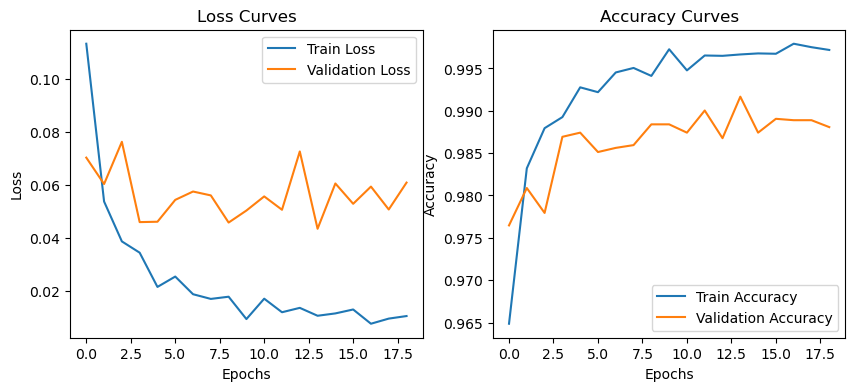

161/161 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9920
Test accuracy: 0.9920


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Filter the data to include only digits 0 to 4
train_mask = (train_labels >= 0) & (train_labels <= 4)
test_mask = (test_labels >= 0) & (test_labels <= 4)
train_images, train_labels = train_images[train_mask], train_labels[train_mask]
test_images, test_labels = test_images[test_mask], test_labels[test_mask]

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)
train_images, val_images, test_images = (
    train_images / 255.0,
    val_images / 255.0,
    test_images / 255.0,
)

# Define the DNN model with softmax output for 5 classes
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(5, activation='softmax')  # 5 neurons for 0 to 4 digits
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping]
)

# Plot learning curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

### Ans 2

Transfer learning can be a powerful technique to leverage pretrained models for new tasks with limited data. Let's break down your questions step by step:

a. **Create a new DNN with Pretrained Hidden Layers:**
   - First, you'll need to load the pretrained model and freeze its hidden layers.
   - Create a new DNN with the frozen layers and a new softmax output layer suitable for classifying digits 5 to 9.

b. **Train on Digits 5 to 9 with Limited Data:**
   - Train the new DNN on the dataset containing only 100 images per digit (digits 5 to 9). Measure the time it takes to train the model.
   - Evaluate if high precision can be achieved with this small dataset.

c. **Cache Frozen Layers and Train:**
   - Cache the activations of the frozen layers for the dataset to avoid recomputing them during training.
   - Train the model again and measure how much faster it is.

d. **Reuse Four Hidden Layers:**
   - Modify the new DNN to use only four of the pretrained hidden layers (instead of five).
   - Train and evaluate this model to see if it achieves a higher precision.

e. **Unfreeze Top Two Hidden Layers and Continue Training:**
   - Unfreeze the top two hidden layers of the pretrained model.
   - Continue training the model on the dataset.
   - Evaluate if unfreezing these layers helps the model perform better.

Let's start with part (a), creating a new DNN with the pretrained hidden layers and replacing the softmax output layer. Once we complete that step, we can proceed to the other parts. Please provide the pretrained model you want to use, or specify if you want to use a common pretrained model like VGG16, ResNet, etc.

Epoch 1/10
736/736 [==============================] - 136s 174ms/step - loss: 0.6328 - accuracy: 0.8127 - val_loss: 0.3526 - val_accuracy: 0.9070
Epoch 2/10
736/736 [==============================] - 126s 172ms/step - loss: 0.3291 - accuracy: 0.9011 - val_loss: 0.2612 - val_accuracy: 0.9250
Epoch 3/10
736/736 [==============================] - 128s 174ms/step - loss: 0.2683 - accuracy: 0.9165 - val_loss: 0.2202 - val_accuracy: 0.9378
Epoch 4/10
736/736 [==============================] - 123s 168ms/step - loss: 0.2340 - accuracy: 0.9271 - val_loss: 0.2073 - val_accuracy: 0.9391
Epoch 5/10
736/736 [==============================] - 123s 167ms/step - loss: 0.2179 - accuracy: 0.9309 - val_loss: 0.1839 - val_accuracy: 0.9446
Epoch 6/10
736/736 [==============================] - 123s 167ms/step - loss: 0.2014 - accuracy: 0.9361 - val_loss: 0.2486 - val_accuracy: 0.9160
Epoch 7/10
736/736 [==============================] - 127s 173ms/step - loss: 0.1906 - accuracy: 0.9394 - val_loss: 0.1788 -

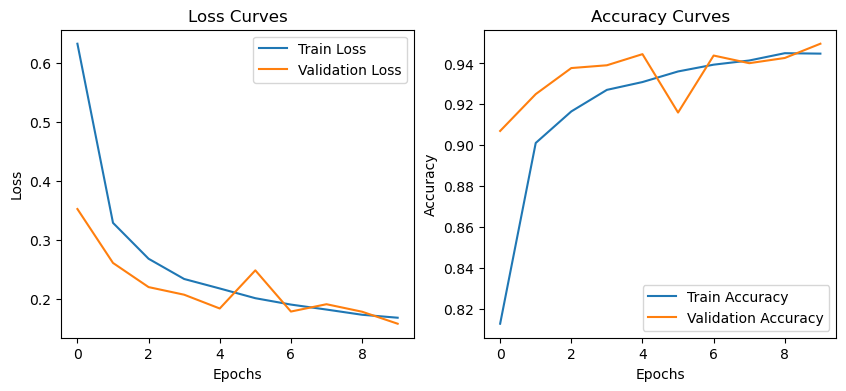

152/152 [==============================] - 21s 138ms/step - loss: 0.1522 - accuracy: 0.9523
Test accuracy: 0.9523


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, UpSampling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_mask = (train_labels >= 5) & (train_labels <= 9)
test_mask = (test_labels >= 5) & (test_labels <= 9)
train_images, train_labels = train_images[train_mask], train_labels[train_mask]
test_images, test_labels = test_images[test_mask], test_labels[test_mask]

# Adjust labels to be within the range [0, 4]
train_labels -= 5
test_labels -= 5

# Resize images to 32x32 pixels (ResNet-50 input size)
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, axis=-1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, axis=-1))
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

train_images = train_images.numpy().astype(np.float32) / 255.0
test_images = test_images.numpy().astype(np.float32) / 255.0

# Load the pretrained ResNet-50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new softmax output layer for classifying digits 0 to 4
flatten = keras.layers.Flatten()(base_model.output)
output = Dense(5, activation='softmax')(flatten)

# Build the new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

### Ans 3


**Part A (Building DNNs):**
In this part, two deep neural networks (DNNs) named DNN A and DNN B are constructed. Each network has five hidden layers, each containing 100 neurons, with He initialization and ELU activation. Additionally, a final hidden layer with 10 units is added to both DNNs. These networks are designed to compare pairs of MNIST digit images and predict if they represent the same digit.

**Part B (Data Generation):**
The MNIST training set is divided into two subsets: split #1 with 55,000 images and split #2 with 5,000 images. A function generates training batches where each batch contains pairs of images. Half of the pairs belong to the same class, while the other half come from different classes. Labels are set to 0 for the same-class pairs and 1 for different-class pairs, effectively creating a binary classification task.

**Part C (Training on Data Pairs):**
DNN A and DNN B are trained on split #1 using the generated data pairs. The images in each pair are fed through their respective networks. The concatenated outputs of DNN A and DNN B are passed through a hidden layer, and an output layer with a sigmoid activation function predicts whether the input pairs belong to the same class or not. Binary cross-entropy is used as the loss function, and Adam optimizer is employed.

**Part D (Classifier Training):**
A new DNN model, named `new_dnn`, is created by reusing the hidden layers of DNN A. A softmax output layer with 10 neurons is added to classify MNIST digits. This new model is trained on split #2, which contains only 500 images per class, and sparse categorical cross-entropy loss is used for multi-class classification. The training and validation loss and accuracy are plotted to visualize the classifier's performance.

These code sections collectively enable the construction of DNNs, data generation for training, training on data pairs for binary classification, and training a new classifier on a limited dataset for MNIST digit recognition.

In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data and preprocess it
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255.0

# Create a function to build a DNN with 5 hidden layers of 100 neurons each
def build_dnn():
    model = tf.keras.Sequential()
    for _ in range(5):
        model.add(tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
    return model

# Create DNN A and DNN B
dnn_a = build_dnn()
dnn_b = build_dnn()

# Create input layers for both DNNs
input_a = tf.keras.layers.Input(shape=(784,))
input_b = tf.keras.layers.Input(shape=(784,))

# Pass inputs through DNN A and DNN B
output_a = dnn_a(input_a)
output_b = dnn_b(input_b)

# Concatenate the outputs of DNN A and DNN B and add a hidden layer with 10 units
concat_layer = tf.keras.layers.Concatenate(axis=1)([output_a, output_b])
hidden_layer = tf.keras.layers.Dense(10, activation='elu', kernel_initializer='he_normal')(concat_layer)

# Add the output layer with a single neuron and logistic activation function
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer)

# Create the final model
model = tf.keras.Model(inputs=[input_a, input_b], outputs=output_layer)

# Split the MNIST training set into two sets: split #1 with 55,000 images and split #2 with 5,000 images
X_train1, X_train2 = X_train[:55000], X_train[55000:]
y_train1, y_train2 = y_train[:55000], y_train[55000:]

# Create training data pairs and labels
X1, X2, labels = [], [], []

for _ in range(len(X_train1)):
    # Randomly choose a class
    class_idx = np.random.randint(0, 10)

    # Find two instances from the same class
    class_indices = np.where(y_train1 == class_idx)[0]
    idx1, idx2 = np.random.choice(class_indices, 2, replace=False)

    X1.append(X_train1[idx1])
    X2.append(X_train1[idx2])
    labels.append(0)  # Images are from the same class

    # Randomly choose two different classes
    class_indices = np.arange(10)
    class_indices = class_indices[class_indices != class_idx]
    class_idx1, class_idx2 = np.random.choice(class_indices, 2, replace=False)
    idx1 = np.random.choice(np.where(y_train1 == class_idx1)[0])
    idx2 = np.random.choice(np.where(y_train1 == class_idx2)[0])

    X1.append(X_train1[idx1])
    X2.append(X_train1[idx2])
    labels.append(1)  # Images are from different classes

X1 = np.array(X1)
X2 = np.array(X2)
labels = np.array(labels)

# Compile and train the model on split #1
batch_size = 32
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([X1, X2], labels, epochs=5, batch_size=batch_size)

Epoch 1/5
3438/3438 [==============================] - 33s 7ms/step - loss: 0.3054 - accuracy: 0.8710
Epoch 2/5
3438/3438 [==============================] - 25s 7ms/step - loss: 0.1364 - accuracy: 0.9511
Epoch 3/5
3438/3438 [==============================] - 25s 7ms/step - loss: 0.0888 - accuracy: 0.9695
Epoch 4/5
3438/3438 [==============================] - 25s 7ms/step - loss: 0.0663 - accuracy: 0.9773
Epoch 5/5
3438/3438 [==============================] - 25s 7ms/step - loss: 0.0536 - accuracy: 0.9820


In [28]:
# Create a new DNN by reusing the hidden layers of DNN A
new_dnn = tf.keras.models.Sequential()
for layer in dnn_a.layers[:-1]:  # Exclude the output layer
    new_dnn.add(layer)
# Add a softmax output layer with 10 neurons
new_dnn.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the new model
new_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the new model on split #2
new_dnn.fit(X_train2, y_train2, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
141/141 [==============================] - 4s 10ms/step - loss: 0.8353 - accuracy: 0.8711 - val_loss: 0.2113 - val_accuracy: 0.9600
Epoch 2/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.1827 - val_accuracy: 0.9620
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 0.1908 - val_accuracy: 0.9600
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0111 - accuracy: 0.9980 - val_loss: 0.1872 - val_accuracy: 0.9640
Epoch 5/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.1932 - val_accuracy: 0.9660
Epoch 6/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1910 - val_accuracy: 0.9700
Epoch 7/10
141/141 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1953 - val_accuracy: 0.9720
Epoch

DNN A Architecture:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 100)               78500     
                                                                 
 dense_147 (Dense)           (None, 100)               10100     
                                                                 
 dense_148 (Dense)           (None, 100)               10100     
                                                                 
 dense_149 (Dense)           (None, 100)               10100     
                                                                 
 dense_150 (Dense)           (None, 100)               10100     
                                                                 
Total params: 118900 (464.45 KB)
Trainable params: 118900 (464.45 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________________________________________

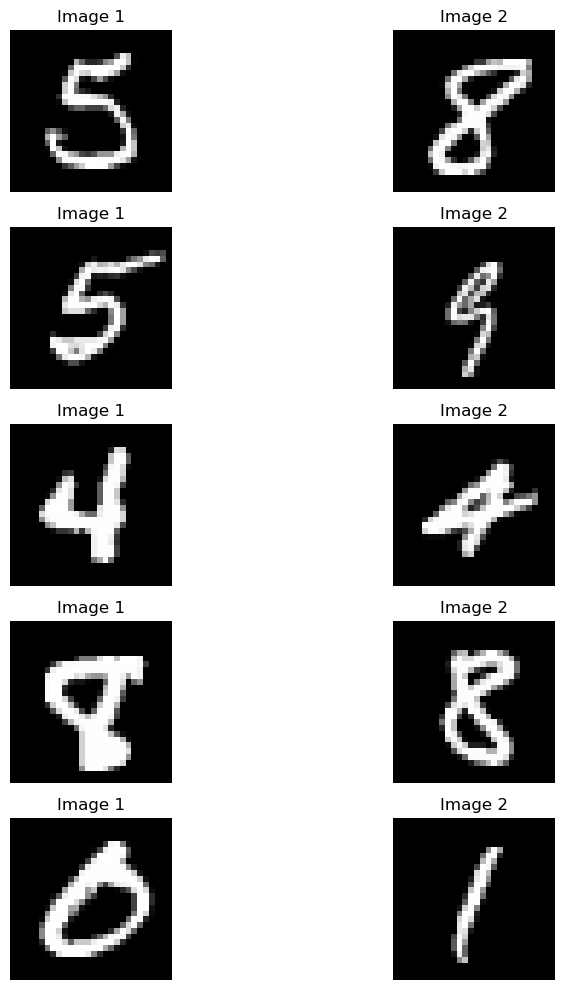

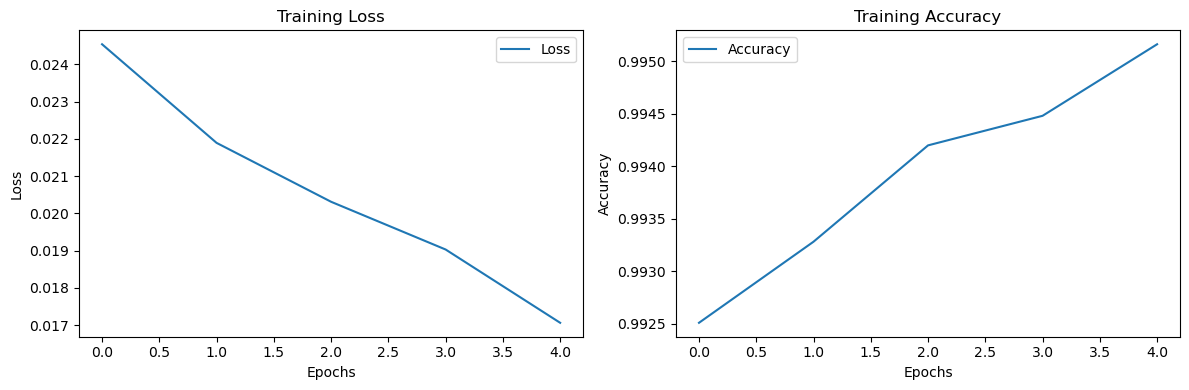

Epoch 1/10
141/141 [==============================] - 1s 7ms/step - loss: 0.4657 - accuracy: 0.9500 - val_loss: 0.3420 - val_accuracy: 0.9740
Epoch 2/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0537 - accuracy: 0.9882 - val_loss: 0.3252 - val_accuracy: 0.9780
Epoch 3/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.3731 - val_accuracy: 0.9740
Epoch 4/10
141/141 [==============================] - 1s 6ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.3618 - val_accuracy: 0.9740
Epoch 5/10
141/141 [==============================] - 1s 6ms/step - loss: 9.8815e-04 - accuracy: 0.9998 - val_loss: 0.3521 - val_accuracy: 0.9740
Epoch 6/10
141/141 [==============================] - 1s 6ms/step - loss: 3.1178e-04 - accuracy: 1.0000 - val_loss: 0.3493 - val_accuracy: 0.9740
Epoch 7/10
141/141 [==============================] - 1s 7ms/step - loss: 2.3447e-04 - accuracy: 1.0000 - val_loss: 0.3478 - val_accuracy: 0

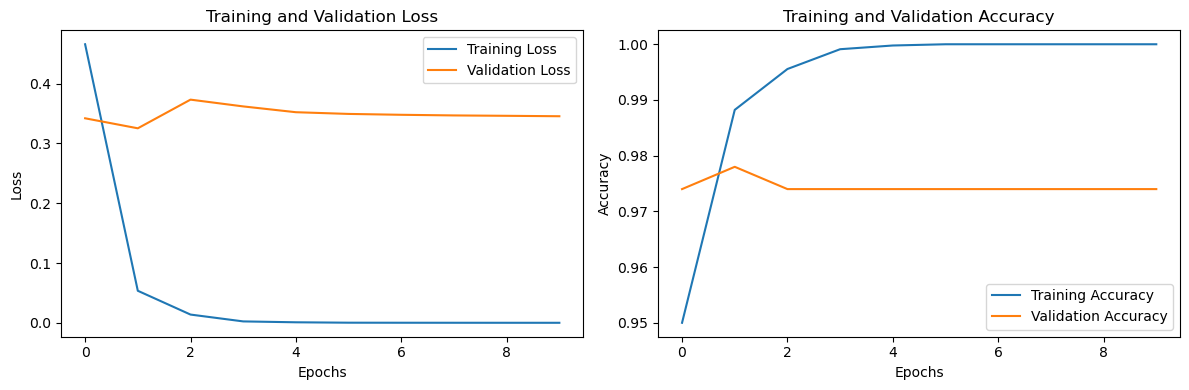

In [30]:
import matplotlib.pyplot as plt
import random

# Part A: Visualize the architecture of DNN A and DNN B
# You can use the model.summary() function to display the architecture.
print("DNN A Architecture:")
dnn_a.summary()

print("\nDNN B Architecture:")
dnn_b.summary()

# Part B: Visualize data generation process (Random pairs)
# Let's visualize a few random pairs of images generated for training
num_samples_to_visualize = 5
fig, axes = plt.subplots(num_samples_to_visualize, 2, figsize=(10, 10))

for i in range(num_samples_to_visualize):
    # Randomly select a sample pair and its label
    idx = random.randint(0, len(X1) - 1)
    img_pair = [X1[idx], X2[idx]]
    label = labels[idx]

    for j in range(2):
        axes[i, j].imshow(img_pair[j].reshape(28, 28), cmap='gray')
        axes[i, j].set_title(f'Image {j+1}')
        axes[i, j].axis('off')

    axes[i, 0].set_ylabel(f'Label: {label}', rotation=0, labelpad=25)

plt.tight_layout()
plt.show()

# Part C: Visualize the training process (loss and accuracy)
# You can plot the training loss and accuracy over epochs using the history object from model.fit()
history = model.fit([X1, X2], labels, epochs=5, batch_size=batch_size, verbose=0)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Part D: Visualize the performance of the MNIST classifier

# Train the new model on split #2
history_classifier = new_dnn.fit(X_train2, y_train2, epochs=10, batch_size=32, validation_split=0.1)

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_classifier.history['loss'], label='Training Loss')
plt.plot(history_classifier.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_classifier.history['accuracy'], label='Training Accuracy')
plt.plot(history_classifier.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()